You can check and explore further methods applied the tasks we have previously covered from the following link:
https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d313030

Skeleton code is provided from the following tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Dataset: https://pytorch.org/docs/stable/_modules/torchvision/datasets/cifar.html#CIFAR100

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822 ,0.4465), (0.2470, 0.2434, 0.2615)),
     transforms.RandomRotation(degrees=(-30, 30), fill=(0,)),
     transforms.RandomHorizontalFlip()
     ])

In [3]:
batch_size = 12


trainset = torchvision.datasets.CIFAR100(root='./data/CIFAR100', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data/CIFAR100', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 
           'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 
           'chimpanzee', 'clock', 'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 
           'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
           'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 
           'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 
           'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
           'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
           'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm')

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/CIFAR100/cifar-100-python.tar.gz to ./data/CIFAR100
Files already downloaded and verified


In [4]:
# let's visualize some examples
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([12, 3, 32, 32])
torch.Size([12])
tensor([49, 38, 30,  5, 77, 36, 28, 30, 16, 69,  5, 86])


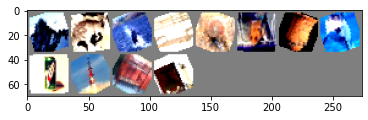

mountain house dinosaur   bed snail  girl crocodile dinosaur  cans rocket   bed telephone


In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [7]:
# base method we provide:
import torch.nn as nn
import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(16, 32, 5)
#         self.fc1 = nn.Linear(32 * 5 * 5, 200)
#         self.fc2 = nn.Linear(200, 128)
#         self.fc3 = nn.Linear(128, 100)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [8]:
# (Optional but highly recommended) TODO: You can define your own neural network to create a better performing model!
class emfiNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
        nn.Conv2d(3, 32, 3,padding=1),
        nn.ELU(),
        nn.Conv2d(32, 64, 3, stride=1, padding=1),
        nn.ELU(),
        nn.MaxPool2d(2, 2),
        nn.Dropout(0.1),
        nn.BatchNorm2d(64),

        nn.Conv2d(64, 128, 3, stride=1, padding=1),
        nn.ELU(),
        nn.Conv2d(128, 128, 3, stride=1, padding=1),
        nn.ELU(),
        nn.MaxPool2d(2, 2),
        nn.Dropout(0.25),
        nn.BatchNorm2d(128),

        nn.Conv2d(128, 256, 3, stride=1, padding=1),
        nn.ELU(),
        nn.Conv2d(256, 256, 3, stride=1, padding=1),
        nn.ELU(),
        nn.MaxPool2d(2, 2),
        nn.Dropout(0.5),
        nn.BatchNorm2d(256),

        nn.Flatten(),
        nn.Linear(256 * 4 * 4, 1024),
        nn.ELU(),
        nn.Linear(1024,512),
        nn.ELU(),
        nn.Linear(512, 100))
     
    def forward(self, xb):
        return self.network(xb)

In [9]:
# if you want to train on GPU:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [10]:
emfiNet = emfiNet()

emfiNet.to(device)

emfiNet.train()
# base optimizer with following parameters:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(emfiNet.parameters(), lr=0.001, momentum=0.9,weight_decay=1e-4)

In [11]:
# Training loop
for epoch in range(18):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = emfiNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.892
[1,  4000] loss: 3.344
[2,  2000] loss: 3.036
[2,  4000] loss: 2.881
[3,  2000] loss: 2.696
[3,  4000] loss: 2.629
[4,  2000] loss: 2.490
[4,  4000] loss: 2.425
[5,  2000] loss: 2.306
[5,  4000] loss: 2.306
[6,  2000] loss: 2.180
[6,  4000] loss: 2.189
[7,  2000] loss: 2.077
[7,  4000] loss: 2.070
[8,  2000] loss: 1.978
[8,  4000] loss: 1.979
[9,  2000] loss: 1.902
[9,  4000] loss: 1.896
[10,  2000] loss: 1.812
[10,  4000] loss: 1.831
[11,  2000] loss: 1.750
[11,  4000] loss: 1.757
[12,  2000] loss: 1.670
[12,  4000] loss: 1.713
[13,  2000] loss: 1.633
[13,  4000] loss: 1.655
[14,  2000] loss: 1.579
[14,  4000] loss: 1.607
[15,  2000] loss: 1.523
[15,  4000] loss: 1.546
[16,  2000] loss: 1.461
[16,  4000] loss: 1.521
[17,  2000] loss: 1.425
[17,  4000] loss: 1.460
[18,  2000] loss: 1.366
[18,  4000] loss: 1.418
Finished Training


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


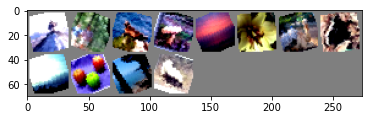

GroundTruth:  mountain flatfish  seal mushrooms   sea tulips camel butterfly cloud apples   sea skunk
Predicted:    fox mouse  cups mushrooms   sea spider tiger beetle   sea apples television skunk


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.cuda()
labels = labels.cuda()

outputs = emfiNet(images)
_, predicted = torch.max(outputs.data, 1)
# print images
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(batch_size)))

In [13]:
# test on all test data
emfiNet.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = emfiNet(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct)
print(total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

5653
10000
Accuracy of the network on the 10000 test images: 56 %
